In [1]:
import numpy as np
import pandas as pd
import pylab as py
import scipy.optimize as so
from scipy.fft import fft,ifft
import numpy.fft as fft
import scipy.signal as sg
import lib_optics as lib_o
import lib_m 
import sys
import os

c_m = 299792458.
pi = np.pi
radeg = (180./pi)
delta_freqGHz = 10 # GHz


n_in = 3.14
losstan_in = 1.e-4
d_m = 3e-3

index_guess = n_in
losstan_guess = losstan_in
# incident angle 
incidentangle_rad_i = 5./radeg  #   CHANGE THIS ANGLE TO REFLECT THE SETUP
incidentangle_rad_arr = np.array([incidentangle_rad_i])
incpol = 1

In [2]:
loaded_arr = np.load('notched data from first systematic.npy')
print(loaded_arr)

[[3.17943497e+00+0.00000000e+00j 4.61036640e-04+0.00000000e+00j
  3.30358311e-04+0.00000000e+00j 6.19790773e-05+0.00000000e+00j
  2.57067210e+01+1.10653355e-15j 1.01254578e-01+2.17922752e-18j]
 [3.17943497e+00+0.00000000e+00j 4.61036640e-04+0.00000000e+00j
  3.30358311e-04+0.00000000e+00j 6.19790773e-05+0.00000000e+00j
  2.57067210e+01+1.10653355e-15j 1.01254578e-01+2.17922752e-18j]
 [3.17943497e+00+0.00000000e+00j 4.61036640e-04+0.00000000e+00j
  3.30358311e-04+0.00000000e+00j 6.19790773e-05+0.00000000e+00j
  2.57067210e+01+1.10653355e-15j 1.01254578e-01+2.17922752e-18j]
 ...
 [3.17947043e+00+0.00000000e+00j 4.58932755e-04+0.00000000e+00j
  6.37893866e-04+0.00000000e+00j 1.19688744e-04+0.00000000e+00j
  9.59235124e+01+9.15709360e-16j 1.95593250e-01+9.33590553e-19j]
 [3.17947043e+00+0.00000000e+00j 4.58932755e-04+0.00000000e+00j
  6.37893866e-04+0.00000000e+00j 1.19688744e-04+0.00000000e+00j
  9.59235124e+01+9.15709360e-16j 1.95593250e-01+9.33590553e-19j]
 [3.17947043e+00+0.00000000e+0

In [5]:
index_arr = loaded_arr[:,0]
index_err_arr = loaded_arr[:,1]
losstan_arr = loaded_arr[:,2]
losstan_err_arr = loaded_arr[:,3]
xsq_arr = loaded_arr[:,4]
rms_arr = loaded_arr[:,5]
u_arr = np.linspace(0.7,2.7,1000)

print(index_arr.shape)
print(rms_arr.shape)

(1000,)
(1000,)


/home/julientang2001/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


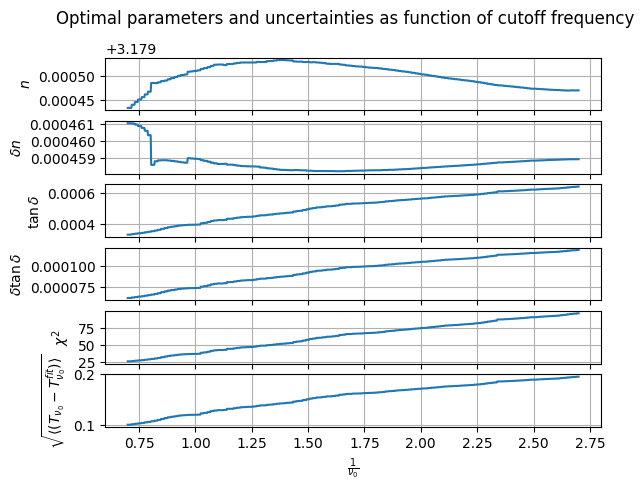

In [6]:
fig,ax = py.subplots(nrows=6,sharex=True)
fig.suptitle('Optimal parameters and uncertainties as function of cutoff frequency')
ax[0].plot(u_arr,index_arr)
ax[0].set_ylabel(r'$n$')
ax[1].plot(u_arr,index_err_arr)
ax[1].set_ylabel(r'$\delta n$')

ax[2].plot(u_arr,losstan_arr)
ax[2].set_ylabel(r'$\tan \delta$')

ax[3].plot(u_arr,losstan_err_arr)
ax[3].set_ylabel(r'$\delta \tan \delta$')

ax[4].plot(u_arr,xsq_arr)
ax[4].set_ylabel(r'$\chi^2$')

ax[5].plot(u_arr,rms_arr)
ax[5].set_ylabel(r'$\sqrt{\langle (T_{\nu_0}-T_{\nu_0}^{fit}) \rangle}$')
ax[0].grid(True)
ax[1].grid(True)
ax[2].grid(True)
ax[3].grid(True)
ax[4].grid(True)
ax[5].grid(True)

ax[5].set_xlabel(r'$\frac{1}{\nu_0}$')
# ax2.plot(freqGHz_data,res,"b.",label = 'Raw data', markeredgewidth=0.0001)
# ax2.plot(freqGHz_data,res_n,"r.",label = 'Notched data with hard cut off',markeredgewidth=0.0001 )
# # py.yscale('log')
# py.ylim(-1,1)
# py.grid()
# py.ylabel('PSD')
# py.xlabel(r'$\nu$ (Ghz)')
# handles, labels = ax2.get_legend_handles_labels()


# py.legend(handles,labels, loc = 'upper left', fontsize = 'x-small')
py.show()